In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import folium
import branca
from datetime import datetime, timedelta,date
import plotly.express as px
import json, requests

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_india_test = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest","totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})

In [3]:
df_india_test["p2t_ratio"]= np.round(100*df_india_test["c_positive"]/df_india_test["c_tests"],2)
df_india_test["positive"] = df_india_test["c_positive"].diff()
df_india_test["tests"] = df_india_test["c_tests"].diff()
df_india_test["p2t_ratio"]= np.round(100*df_india_test["positive"]/df_india_test["tests"],2)
df_india_test = df_india_test[1:]

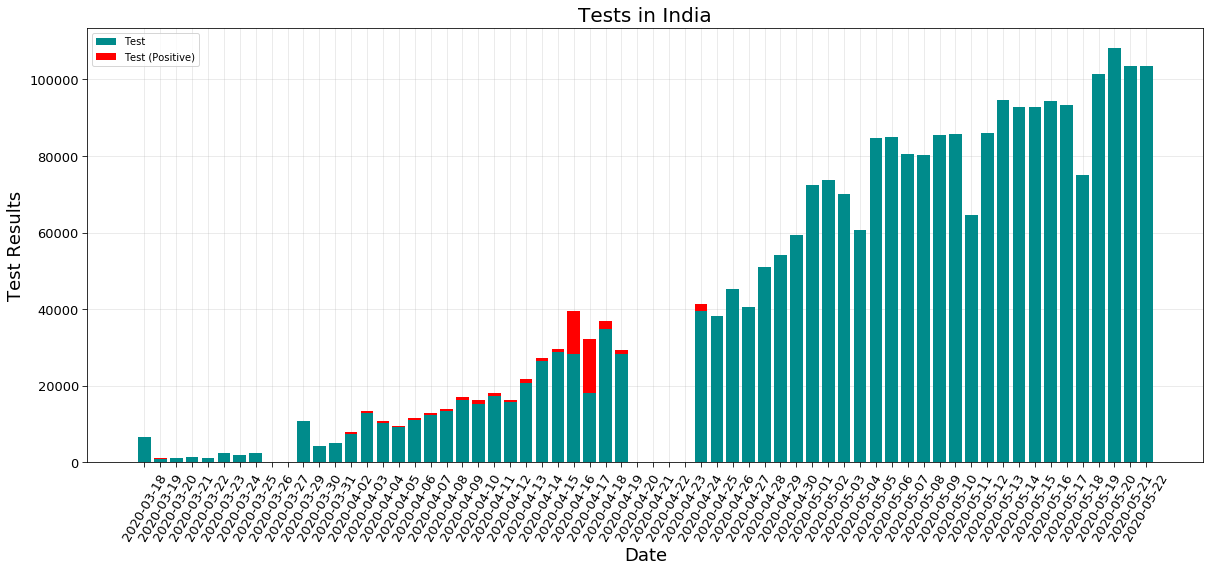

In [19]:
f = plt.figure(figsize=(20,8))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_india_test["day"],df_india_test["tests"].values[:],color="darkcyan",label="Test"+str())
plt.bar(df_india_test["day"],df_india_test["positive"].values[:],bottom=df_india_test["tests"].values[:]-df_india_test["positive"].values[:],color="Red",label="Test (Positive)")
plt.tick_params(size=5,labelsize = 13)
plt.tick_params(axis="x",size=5,labelsize = 13,labelrotation=60 )
plt.xlabel("Date",fontsize=18)
plt.ylabel("Test Results",fontsize=18)

plt.title("Tests in India",fontsize=20)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('Test_India.png')

In [5]:
df_india_test["c_tests"][-1:].values[0]


2719434.0

In [6]:
np.round(1000000*df_india_test["c_tests"][-1:].values[0]/1300000000,2)

2091.87

In [7]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")
df_india

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,44582,12583,1517,30482
Tamil Nadu,14753,7128,99,7526
Gujarat,13273,5880,802,6591
Delhi,12319,5897,208,6214
Rajasthan,6494,3680,153,2661
Madhya Pradesh,6170,3089,272,2809
Uttar Pradesh,5735,3324,152,2259
West Bengal,3332,1221,265,1846
Andhra Pradesh,2667,1731,55,881


In [8]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],2)
df_t.style.background_gradient(cmap='Purples',axis=1)

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
Total,124794,51824,3726,69237,2.99


In [9]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),2)
df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
state,,,,,
Maharashtra,44582,12583,1517,30482,3.4
Tamil Nadu,14753,7128,99,7526,0.67
Gujarat,13273,5880,802,6591,6.04
Delhi,12319,5897,208,6214,1.69
Rajasthan,6494,3680,153,2661,2.36
Madhya Pradesh,6170,3089,272,2809,4.41
Uttar Pradesh,5735,3324,152,2259,2.65
West Bengal,3332,1221,265,1846,7.95
Andhra Pradesh,2667,1731,55,881,2.06


In [10]:
df_india[df_india['deaths'] > 0].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
state,,,,,
Maharashtra,44582,12583,1517,30482,3.4
Tamil Nadu,14753,7128,99,7526,0.67
Gujarat,13273,5880,802,6591,6.04
Delhi,12319,5897,208,6214,1.69
Rajasthan,6494,3680,153,2661,2.36
Madhya Pradesh,6170,3089,272,2809,4.41
Uttar Pradesh,5735,3324,152,2259,2.65
West Bengal,3332,1221,265,1846,7.95
Andhra Pradesh,2667,1731,55,881,2.06


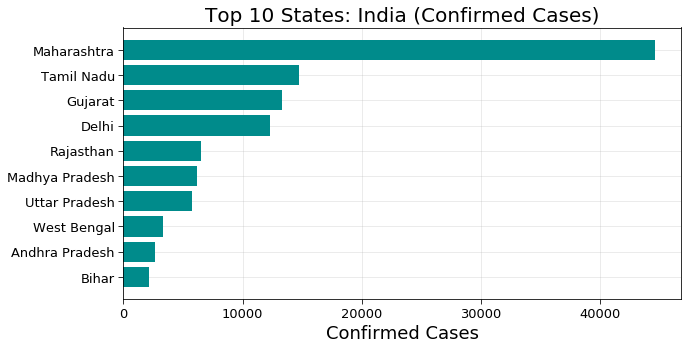

In [11]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_India (Confirmed Cases).png')

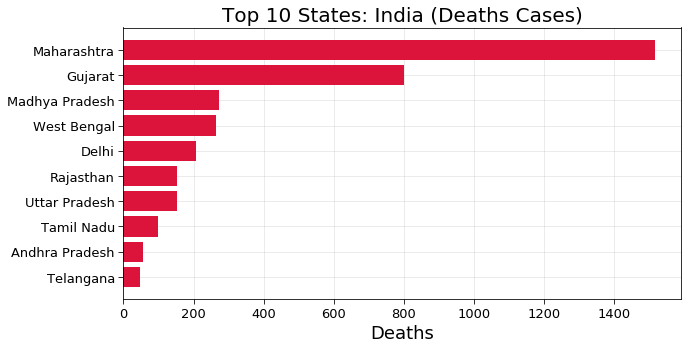

In [12]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[-10:],df_india.sort_values('deaths')["deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: India (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_India (Deaths Cases).png')

In [13]:
df_india.corr().style.background_gradient(cmap='Reds')

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
confirmed,1,0.958668,0.932971,0.990098,0.312581
recovered,0.958668,1,0.864718,0.909586,0.359721
deaths,0.932971,0.864718,1,0.931855,0.454649
active,0.990098,0.909586,0.931855,1,0.270119
Mortality Rate (per 100),0.312581,0.359721,0.454649,0.270119,1
